In [1]:
from functools import reduce

In [2]:
import gmm

In [3]:
%cd ../..

/home/work/AnacondaProjects/combinators


In [4]:
from combinators import lens, sampler, tracing
from combinators.model import collections

In [5]:
D = 2
K = 3
N = 5
NUM_SAMPLES = 1

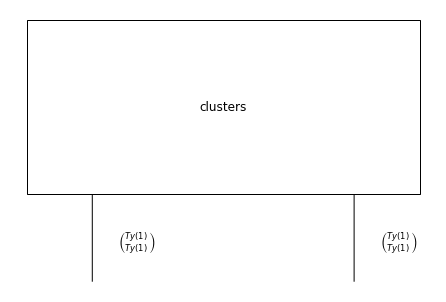

In [6]:
clusters = sampler.ImportanceSampler(gmm.GaussianClusters(K, D), None, (NUM_SAMPLES,))
clusters_prior = tracing.TracedLensBox('clusters', lens.LensPRO(0), lens.LensPRO(2), clusters, clusters.update)
clusters_prior.draw()

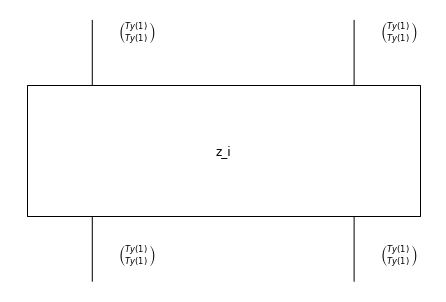

In [7]:
z_sampler = sampler.ImportanceSampler(gmm.SampleCluster(K), None, (NUM_SAMPLES,))
cluster_latent = tracing.TracedLensBox('z_i', lens.LensPRO(2), lens.LensPRO(2), z_sampler, z_sampler.update)
cluster_latent.draw()

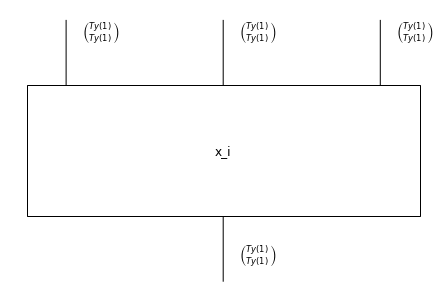

In [8]:
x_sampler = sampler.ImportanceSampler(gmm.SamplePoint(), None, (NUM_SAMPLES,))
observe_point = tracing.TracedLensBox('x_i', lens.LensPRO(3), lens.LensPRO(1), x_sampler, x_sampler.update)
observe_point.draw()

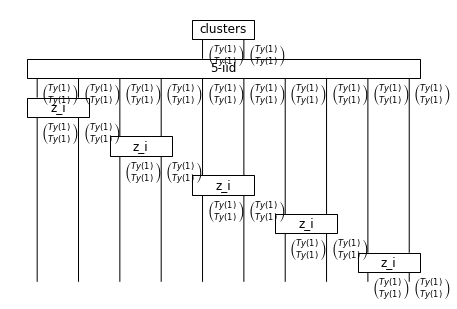

In [9]:
priors = clusters_prior >> collections.iid(clusters_prior.cod, N, cluster_latent)
priors.draw()

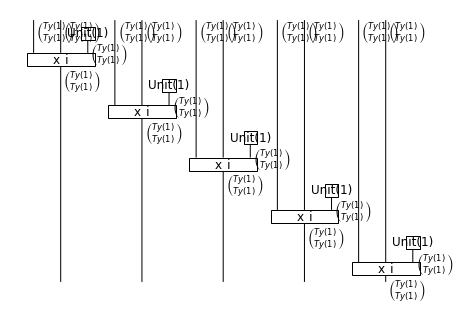

In [10]:
nones = [lens.Unit(None, lens.LensPRO(1)) for _ in range(N)]
unconditioned_xs = [lens.Id(lens.LensPRO(2)) @ none >> observe_point for none in nones]
likelihood = reduce(lambda f, g: f @ g, unconditioned_xs, lens.Id(lens.LensPRO(0)))
likelihood.draw()

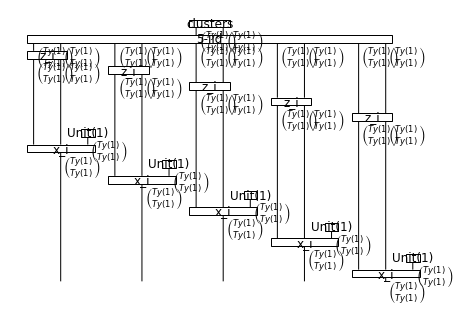

In [11]:
model = priors >> likelihood
model.draw()

In [12]:
model()

((tensor([[[ 1.4629, -0.4852]]]),
  tensor([[[-0.0469, -0.6293]]]),
  tensor([[[ 0.0536, -0.2629]]]),
  tensor([[[-0.3546, -3.9926]]]),
  tensor([[[ 1.8243, -0.3028]]])),
 (tensor([0.]),
  Trace{'mu': Normal([torch.FloatTensor of size 3x2]), 'tau': Gamma([torch.FloatTensor of size 3x2]), 'z': Categorical([torch.LongTensor of size ]), 'zi': Categorical([torch.LongTensor of size ]), 'zii': Categorical([torch.LongTensor of size ]), 'ziii': Categorical([torch.LongTensor of size ]), 'ziiii': Categorical([torch.LongTensor of size ]), 'x': Normal([torch.FloatTensor of size 1x1x2]), 'xi': Normal([torch.FloatTensor of size 1x1x2]), 'xii': Normal([torch.FloatTensor of size 1x1x2]), 'xiii': Normal([torch.FloatTensor of size 1x1x2]), 'xiiii': Normal([torch.FloatTensor of size 1x1x2])}))